In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df = pd.read_csv("Livwell Peru Clean2.csv")

In [46]:
df['region_type'] = df['region_type'].str.capitalize()
df = df[df['region_type'].isin(['Coastal', 'Highland', 'Amazon'])]

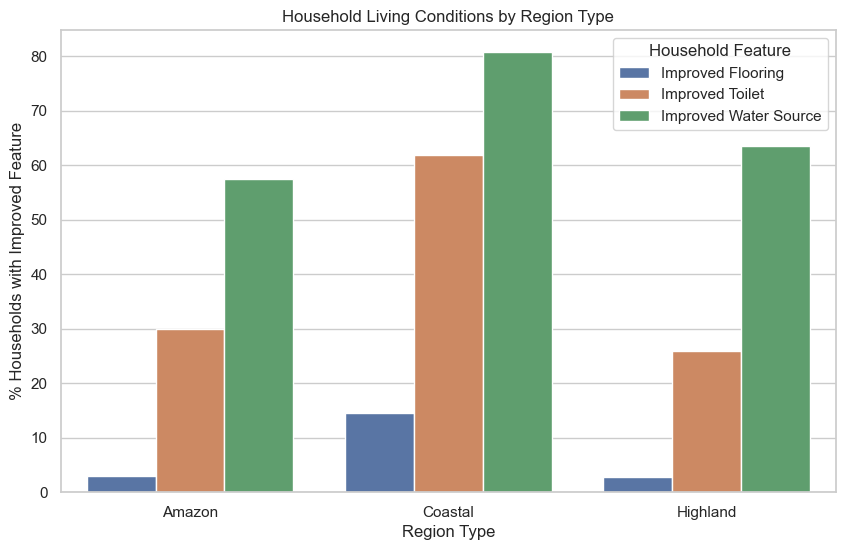

In [47]:
# Household Living Conditions by Region Type

living_cols = {
    "HH_floor_high_p": "Improved Flooring",
    "HH_toilet_high_p": "Improved Toilet",
    "HH_water_high_p": "Improved Water Source"}
living_df = df[["region_type"] + list(living_cols.keys())]
living_df = living_df.groupby("region_type").mean().reset_index()
living_df = living_df.melt(id_vars="region_type", var_name="Indicator", value_name="Percentage")
living_df["Indicator"] = living_df["Indicator"].map(living_cols)

plt.figure(figsize=(10, 6))
sns.barplot(data=living_df, x="region_type", y="Percentage", hue="Indicator")
plt.title("Household Living Conditions by Region Type")
plt.ylabel("% Households with Improved Feature")
plt.xlabel("Region Type")
plt.legend(title="Household Feature")
plt.show()

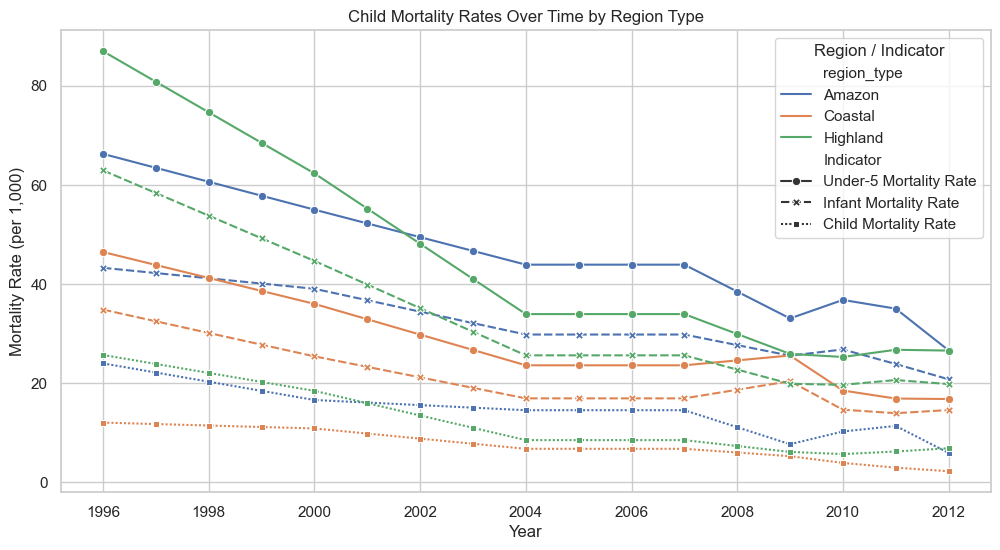

In [48]:
# Child Mortality Trends by Region Type and Year

mortality_cols = {
    "HL_U5MR": "Under-5 Mortality Rate",
    "HL_IMR": "Infant Mortality Rate",
    "HL_CMR": "Child Mortality Rate"}
mortality_df = df[["year", "region_type"] + list(mortality_cols.keys())]
mortality_df = mortality_df.melt(id_vars=["year", "region_type"], var_name="Indicator", value_name="Rate")
mortality_df["Indicator"] = mortality_df["Indicator"].map(mortality_cols)

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=mortality_df,
    x="year",
    y="Rate",
    hue="region_type",
    style="Indicator",
    markers=True,
    errorbar=None
)
plt.title("Child Mortality Rates Over Time by Region Type")
plt.ylabel("Mortality Rate (per 1,000)")
plt.xlabel("Year")
plt.legend(title="Region / Indicator")
plt.show()

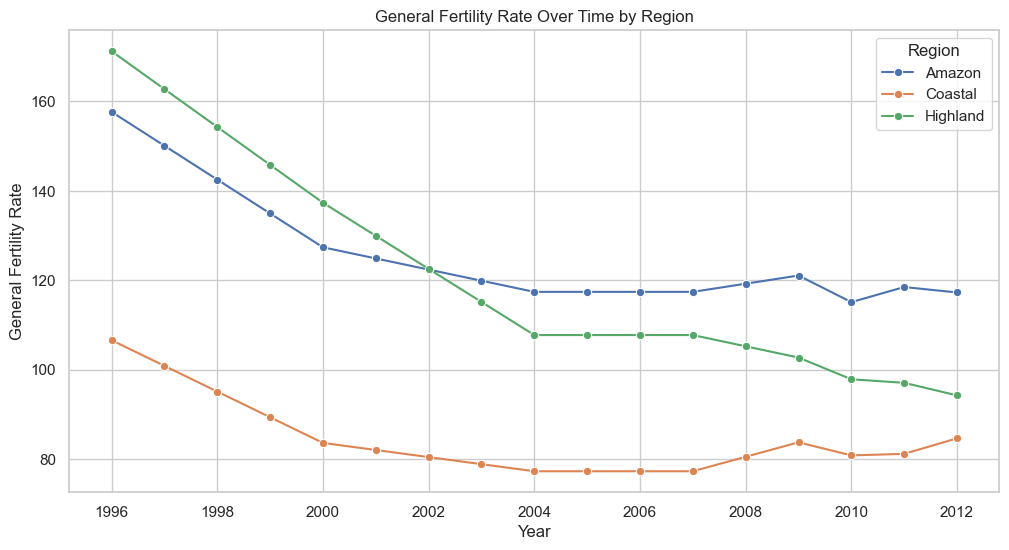

In [49]:
df = df.dropna(subset=['FF_GFR'])

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='year', y='FF_GFR', hue='region_type', marker='o', errorbar=None)

plt.title("General Fertility Rate Over Time by Region")
plt.xlabel("Year")
plt.ylabel("General Fertility Rate")
plt.legend(title="Region")
plt.show()